In [1]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

In [26]:
input_image = cv2.imread('input.png')
output_image_01 = cv2.imread('Result1.png')
output_image_02 = cv2.imread('Result2.png')
output_image_03 = cv2.imread('Result3.png')
output_image_04 = cv2.imread('Result4.png')

# For output-1

In [27]:
# Negative transformation

negative_image = input_image.copy()
h, w, _ = input_image.shape

for m in range(0, h-1):
    for n in range(0, w-1):
        
        pix = negative_image[m, n]
        
        pix[0] = 255 - pix[0]
        
        pix[1] = 255 - pix[1]
        
        pix[2] = 255 - pix[2]
        
        negative_image[m, n] = pix

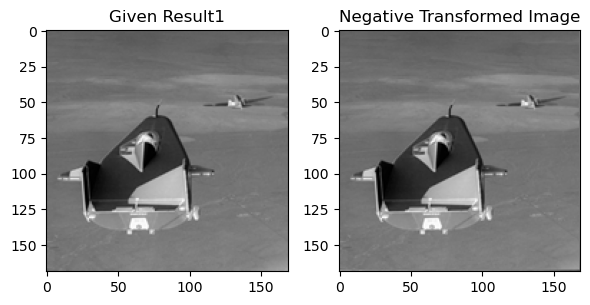

In [67]:
figure, axes = plt.subplots(nrows = 1, ncols = 2, dpi=100)
axes[0].set_title('Given Result1')
axes[0].imshow(output_image_01)

axes[1].set_title('Negative Transformed Image')
axes[1].imshow(negative_image)

figure.tight_layout()
plt.show()

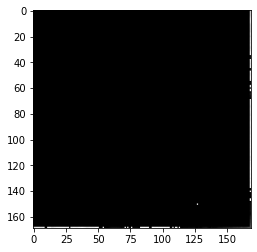

In [78]:
# Determining the Difference

difference_1 = np.subtract(output_image_01, negative_image)
cv2.imwrite('Difference_01.png', difference_1)

dif1 = cv2.imread('Difference_01.png')
plt.imshow(dif1)
plt.show()

# For output-2

In [91]:
# Contrast Stretching

def pixValue(pixel, x1, y1, x2, y2):
    if (0 <= pixel and pixel <= x1):
        return (y1 / x1)*pixel
    elif (x1 < pixel and pixel <= x2):
        return ((y2 - y1)/(x2 - x1)) * (pixel - x1) + y1
    else:
        return ((255 - y2)/(255 - x2)) * (pixel - x2) + y2
    
img = cv2.imread('input.png')

x1 = 110
y1 = 0
x2 = 175
y2 = 240

pixValue_vec = np.vectorize(pixValue)

stretched_image = pixValue_vec(img, x1, y1, x2, y2)

cv2.imwrite('stretched_image.png', stretched_image)

True

In [92]:
stretched_image = cv2.imread('stretched_image.png')

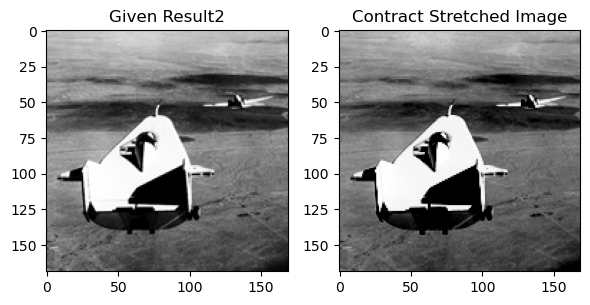

In [93]:
figure, axes = plt.subplots(nrows = 1, ncols = 2, dpi=100)
axes[0].set_title('Given Result2')
axes[0].imshow(output_image_02)

axes[1].set_title('Contract Stretched Image')
axes[1].imshow(stretched_image)

figure.tight_layout()
plt.show()

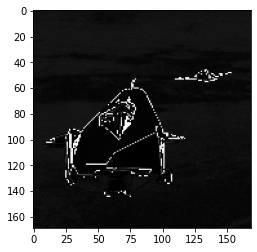

In [94]:
# Determining the Difference

difference_2 = np.subtract(output_image_02, stretched_image)
cv2.imwrite('Difference_02.png', difference_2)

dif2 = cv2.imread('Difference_02.png')
plt.imshow(dif2)
plt.show()

# For output-3

In [45]:
# Log transformation
input_image = cv2.imread('input.png')

c = 255/(np.log(1 + np.max(input_image)))
log_transformed = c * (np.log(1 + input_image))

log_transformed = np.array(log_transformed, dtype = np.uint8)

cv2.imwrite('log_transformed.png', log_transformed)

C:\Users\safay\AppData\Local\Temp\ipykernel_37728\3420636306.py:5: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + input_image)


True

In [46]:
log_transformed_image = cv2.imread('log_transformed.png')

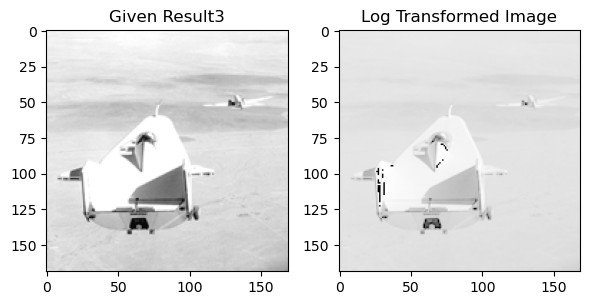

In [70]:
figure, axes = plt.subplots(nrows = 1, ncols = 2, dpi=100)
axes[0].set_title('Given Result3')
axes[0].imshow(output_image_03)

axes[1].set_title('Log Transformed Image')
axes[1].imshow(log_transformed_image)

figure.tight_layout()
plt.show()

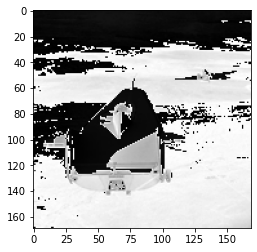

In [81]:
# Determining the Difference

difference_3 = np.subtract(output_image_03, log_transformed_image)
cv2.imwrite('Difference_03.png', difference_3)

dif3 = cv2.imread('Difference_03.png')
plt.imshow(dif3)
plt.show()

# For output-4

In [83]:
input_image = cv2.imread('input.png')

for gamma in [3.2]:
    
    gamma_applied = np.array(255*(input_image/255) ** gamma, dtype = 'uint8')
    
    cv2.imwrite('gamma_applied.png', gamma_applied)

In [84]:
gamma_transformed_image = cv2.imread('gamma_applied.png')

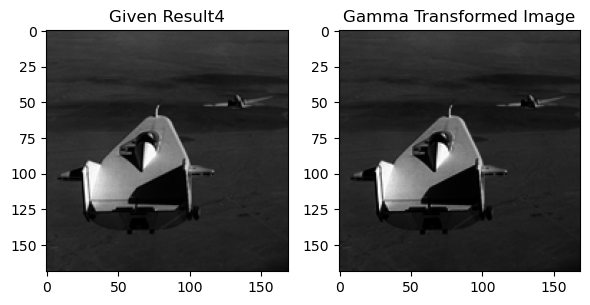

In [85]:
figure, axes = plt.subplots(nrows = 1, ncols = 2, dpi=100)
axes[0].set_title('Given Result4')
axes[0].imshow(output_image_04)

axes[1].set_title('Gamma Transformed Image')
axes[1].imshow(gamma_transformed_image)

figure.tight_layout()
plt.show()

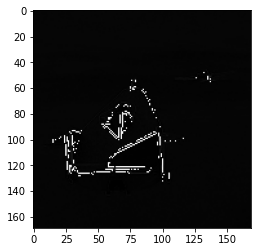

In [86]:
# Determining the Difference

difference_4 = np.subtract(output_image_04, gamma_transformed_image)
cv2.imwrite('Difference_04.png', difference_4)

dif4 = cv2.imread('Difference_04.png')
plt.imshow(dif4)
plt.show()